In [1]:
# import the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('creditcard.csv')
print('data imported')

data imported


In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [6]:
# check null values
df.isnull().sum().any()

False

In [7]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:>

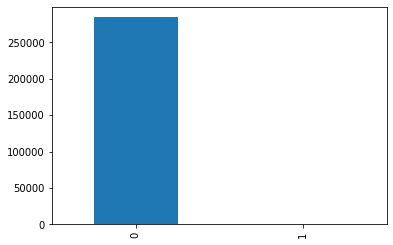

In [8]:
df['Class'].value_counts().plot(kind='bar')

In [9]:
# Data is imbalanced
frauds=df[df['Class']==1]
normal=df[df['Class']==0]

In [10]:
frauds.shape

(492, 31)

In [11]:
normal.shape

(284315, 31)

In [12]:
normal['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [14]:
frauds['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [15]:
#Normaliza the Amount data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df['Amount']=sc.fit_transform(df['Amount'].values.reshape(-1,1))

In [16]:
df['Amount']

0         0.244964
1        -0.342475
2         1.160686
3         0.140534
4        -0.073403
            ...   
284802   -0.350151
284803   -0.254117
284804   -0.081839
284805   -0.313249
284806    0.514355
Name: Amount, Length: 284807, dtype: float64

In [17]:
df=df.drop(['Time'],axis=1)

In [18]:
df.shape

(284807, 30)

In [ ]:
# Autoencoder- Reconstruct the input back

Fraud

X_train-
#Normal- Train the autoencoder model normal transaction

X_test
# Fraud & Normal
inp1  0.1    Normal data
inp2  0.3    Normal
 
inp3  5.0    Fruad
inp4  9.0    Fraud
inp5  0.32

In [19]:
# split the data
from sklearn.model_selection import train_test_split
X_train,X_test=train_test_split(df,test_size=0.2,random_state=42)

In [21]:
X_train=X_train.drop(['Class'],axis=1)

In [22]:
X_train.shape

(227845, 29)

In [23]:
y_test=X_test['Class']
X_test=X_test.drop(['Class'],axis=1)

In [24]:
X_test.shape

(56962, 29)

In [25]:
# Create the Architecture
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.models import Model,load_model

In [31]:
# Create Autoencoder model
input_dim=X_train.shape[1]

input_layer=Input(shape=(input_dim,))
encoder_1=Dense(14,activation='tanh')(input_layer)
encoder_2=Dense(7,activation='relu')(encoder_1)

#decoder_1=Dense(7,activation='tanh')(encoder_2)
decoder_2=Dense(14,activation='tanh')(encoder_2)
out_layer=Dense(input_dim,activation='relu')(decoder_2)

autoencoder=Model(inputs=input_layer,outputs=out_layer)


In [32]:
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 29)]              0         
                                                                 
 dense_14 (Dense)            (None, 14)                420       
                                                                 
 dense_15 (Dense)            (None, 7)                 105       
                                                                 
 dense_16 (Dense)            (None, 14)                112       
                                                                 
 dense_17 (Dense)            (None, 29)                435       
                                                                 
Total params: 1,072
Trainable params: 1,072
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Compile the model
autoencoder.compile(optimizer='rmsprop',
                   loss='mse',
                   metrics=['accuracy'])

In [34]:
# fit the model
epochs=20
batch_size=32

history=autoencoder.fit(X_train,X_train,
                       epochs=epochs,
                       batch_size=batch_size,
                       validation_data=(X_test,X_test))

Epoch 1/20
7121/7121 [==============================] - 14s 2ms/step - loss: 0.8467 - accuracy: 0.5987 - val_loss: 0.7885 - val_accuracy: 0.6604
Epoch 2/20
7121/7121 [==============================] - 14s 2ms/step - loss: 0.7782 - accuracy: 0.6817 - val_loss: 0.7443 - val_accuracy: 0.7027
Epoch 3/20
7121/7121 [==============================] - 13s 2ms/step - loss: 0.7519 - accuracy: 0.7090 - val_loss: 0.7366 - val_accuracy: 0.7154
Epoch 4/20
7121/7121 [==============================] - 14s 2ms/step - loss: 0.7460 - accuracy: 0.7163 - val_loss: 0.7344 - val_accuracy: 0.7041
Epoch 5/20
7121/7121 [==============================] - 14s 2ms/step - loss: 0.7432 - accuracy: 0.7208 - val_loss: 0.7305 - val_accuracy: 0.7208
Epoch 6/20
7121/7121 [==============================] - 22s 3ms/step - loss: 0.7411 - accuracy: 0.7233 - val_loss: 0.7297 - val_accuracy: 0.7147
Epoch 7/20
7121/7121 [==============================] - 26s 4ms/step - loss: 0.7390 - accuracy: 0.7254 - val_loss: 0.7257 - val_ac

In [35]:
autoencoder.save('AEModel_20.h5')